In [1]:
import tensorflow as tf
import os
import zipfile
import shutil
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split


In [ ]:
# !wget --no-check-certificate \
#   https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
#   -O /tmp/rockpaperscissors.zip

fileinZip = "D:/Bangkit/Belajar Machine Learning untuk Pemula/rockpaperscissors.zip"

In [27]:
# zip_ref = zipfile.ZipFile('/tmp/rockpaperscissors.zip', 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

In [4]:
data_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [2]:
def load_images_and_labels(image_directory, image_size=(150, 150)):
    images = []
    labels = []
    for label in os.listdir(image_directory):
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
                image = tf.keras.preprocessing.image.img_to_array(image)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)


# Load images and labels from the directory
data_dir = '/tmp/rockpaperscissors/rps-cv-images'
X, y = load_images_and_labels(data_dir, image_size=(150, 150))

# Normalize the images
X = X / 255.0

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_validation, y_train, y_validation = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)

print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_validation.shape}")

Train features shape: (1312, 150, 150, 3)
Test features shape: (876, 150, 150, 3)


In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=360,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32
)

validation_generator = validation_datagen.flow(
    X_validation, y_validation, batch_size=32
)

# Display class indices
print("Class indices:", label_encoder.classes_)


Class indices: ['paper' 'rock' 'scissors']


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
                          input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), 
                          activation='softmax')
])


c:\Users\hp\anaconda3\envs\my_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(
                  train_generator,
                  steps_per_epoch=25,
                  epochs=20,
                  validation_data=validation_generator,
                  validation_steps=5,
                  verbose=2)

Epoch 1/20
25/25 - 17s - 686ms/step - accuracy: 0.3525 - loss: 1.2443 - val_accuracy: 0.5375 - val_loss: 1.0369
Epoch 2/20


c:\Users\hp\anaconda3\envs\my_env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


25/25 - 7s - 279ms/step - accuracy: 0.4883 - loss: 0.9936 - val_accuracy: 0.5125 - val_loss: 0.9351
Epoch 3/20
25/25 - 12s - 466ms/step - accuracy: 0.5900 - loss: 0.8704 - val_accuracy: 0.5375 - val_loss: 1.0571
Epoch 4/20
25/25 - 7s - 262ms/step - accuracy: 0.6406 - loss: 0.8484 - val_accuracy: 0.6187 - val_loss: 0.8130
Epoch 5/20
25/25 - 11s - 450ms/step - accuracy: 0.7088 - loss: 0.7333 - val_accuracy: 0.7312 - val_loss: 0.6830
Epoch 6/20
25/25 - 6s - 259ms/step - accuracy: 0.7793 - loss: 0.5650 - val_accuracy: 0.7895 - val_loss: 0.5959
Epoch 7/20
25/25 - 11s - 457ms/step - accuracy: 0.7887 - loss: 0.5191 - val_accuracy: 0.7937 - val_loss: 0.5012
Epoch 8/20
25/25 - 7s - 260ms/step - accuracy: 0.7949 - loss: 0.5111 - val_accuracy: 0.8313 - val_loss: 0.4424
Epoch 9/20
25/25 - 11s - 450ms/step - accuracy: 0.8150 - loss: 0.4681 - val_accuracy: 0.7750 - val_loss: 0.4972
Epoch 10/20
25/25 - 6s - 255ms/step - accuracy: 0.8184 - loss: 0.4418 - val_accuracy: 0.8687 - val_loss: 0.3444
Epoch 1

In [15]:
eval = model.evaluate(X_validation, y_validation, verbose=1)
print(f'Test loss: {eval[0]}')
print(f'Test accuracy: {eval[1]}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9124 - loss: 0.2574
Test loss: 0.27242782711982727
Test accuracy: 0.9063926935195923


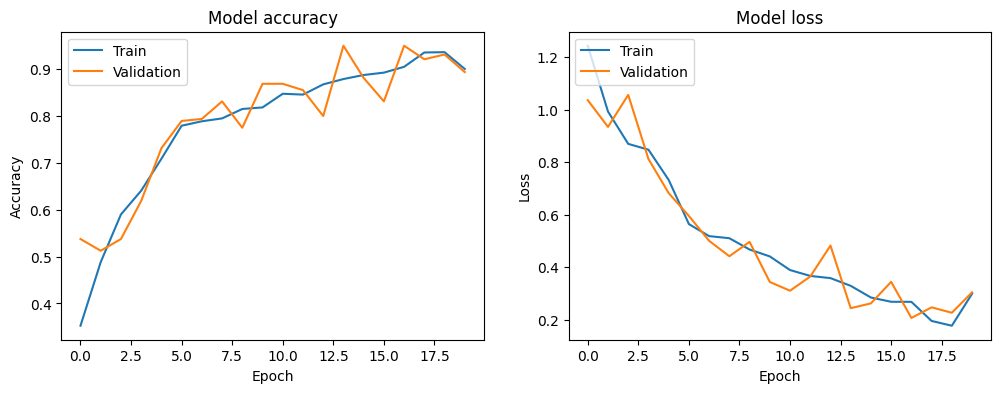

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
